 ----------------------------------
 # Polymers - Solvents Solubility Data Analysis & Deep Model Construction
 ----------------------------------

#####  The algorithm attempts to model (predict) a solubility of plastic materials in various organic solvents or to demonstrate what plastic materials can be dissolved / not dissolved by a certain organic solvent, based on the solute-solvent molecular formulas. The algorithm is using Deep Neural Network.

- The solubility was divided into three major categories: soluble, 'theta' condition for a neutral interaction (as swollen and/or strongly swollen, slight solubility), and non-soluble.

- This dataset is originally from HSP Book, transformed into csv file.

- The datasets consist of several variables (elements and their number in a solute and in a solvent molecules) and one target variable <b>solubility parameter</b>.

--------------------------
### Attribute Information:
--------------------------

1. **Solute abbreviation**
2. **Solvent name**
3. **Solubility parameter (1 to 6)**
4. **Number of solute elements, from C, H, O, N, Cl, Br, S** 
5. **Mw of solute unit**
6. **Tot_Mw of solute**
7. **Number of solvent elements, from C, H, O, N, Cl, Br, S**
8. **Mw of solvent**


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

from scipy.stats import linregress


In [2]:
from sklearn.preprocessing import FunctionTransformer   
from numpy.random import seed
#seed(1)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


In [3]:
from tensorflow.keras.utils import to_categorical
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Full Solubility data preparation

In [5]:
# Read the data
solubility_info = pd.read_csv("data/solubility_matrix.csv")
solubility_info.head()

,Solvent_Solute,A,B,C,D,E,F,G,H,I,...,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH
0,Methanol,5,6,4,5,4,5,6,1,3,...,6,5,6,1,6,5,6,6,6,5
1,Ethanol_96,4,6,4,6,4,1,6,1,1,...,6,5,5,1,6,5,6,6,6,5
2,Ethanol_99p9,5,6,3,5,1,1,6,4,1,...,6,6,4,1,6,5,6,6,6,6
3,n-Propanol,5,6,3,5,1,1,6,4,1,...,5,1,5,1,6,4,6,6,6,6
4,n-Butanol,5,6,3,5,1,1,6,5,1,...,5,1,3,1,6,4,6,6,6,6


In [6]:
len(solubility_info)

88

In [7]:
element_info = pd.read_csv("data/element_info.csv")


In [8]:
solvents= solubility_info['Solvent_Solute'].to_list()
#solvents

In [11]:
solutes = []
solvents = []
solubility_params = []

solutes1=[]
solvents1=[]
params1 = []

for i, row in solubility_info.iteritems():
    
    if i=='Solvent_Solute':
        solvents = row.to_list()
#        print("len of solvents ", len(solvents))
    else:
        solutes = []
        for j in range(len(solvents)):
            solutes.append(i)
#        print("len of solutes ", len(solutes))
        
        solubility_params = row.to_list()
#        print("len of params ", len(solubility_params))
    
    for j in range(len(solutes)):
        solutes1.append(solutes[j])
        solvents1.append(solvents[j])
        params1.append(solubility_params[j])
    
    print("len of solutes, solvents and params are ", len(solutes1), len(solvents1), len(params1))

len of solutes, solvents and params are  0 0 0
len of solutes, solvents and params are  88 88 88
len of solutes, solvents and params are  176 176 176
len of solutes, solvents and params are  264 264 264
len of solutes, solvents and params are  352 352 352
len of solutes, solvents and params are  440 440 440
len of solutes, solvents and params are  528 528 528
len of solutes, solvents and params are  616 616 616
len of solutes, solvents and params are  704 704 704
len of solutes, solvents and params are  792 792 792
len of solutes, solvents and params are  880 880 880
len of solutes, solvents and params are  968 968 968
len of solutes, solvents and params are  1056 1056 1056
len of solutes, solvents and params are  1144 1144 1144
len of solutes, solvents and params are  1232 1232 1232
len of solutes, solvents and params are  1320 1320 1320
len of solutes, solvents and params are  1408 1408 1408
len of solutes, solvents and params are  1496 1496 1496
len of solutes, solvents and params a

In [12]:
new_df = pd.DataFrame({
    'solutes': solutes1,
    'solvents': solvents1,
    'solubility_param': params1
})
new_df.head(10)

,solutes,solvents,solubility_param
0,A,Methanol,5
1,A,Ethanol_96,4
2,A,Ethanol_99p9,5
3,A,n-Propanol,5
4,A,n-Butanol,5
5,A,Pentanol-1,4
6,A,2-Ethyl_butanol,3
7,A,2-Ethyl_hexanol,4
8,A,Methyl_isobutyl_carbinol,4
9,A,Propylene_glycol,6


In [13]:
new_df.tail(10)


,solutes,solvents,solubility_param
2894,AH,Ethyl_benzene,6
2895,AH,Styrene,5
2896,AH,Tetralin,4
2897,AH,Hexane,6
2898,AH,Cyclohexane,6
2899,AH,Acetic_acid,4
2900,AH,Formic_acid_90,1
2901,AH,Butyric_acid,6
2902,AH,Benzaldehyde,3
2903,AH,Acetic_anhydride,5


In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 3 columns):
solutes             2904 non-null object
solvents            2904 non-null object
solubility_param    2904 non-null int64
dtypes: int64(1), object(2)
memory usage: 68.2+ KB


In [15]:
len(new_df)


2904

In [16]:
new_df['solubility_category']=''

In [17]:
new_df.head(3)


,solutes,solvents,solubility_param,solubility_category
0,A,Methanol,5,
1,A,Ethanol_96,4,
2,A,Ethanol_99p9,5,


In [19]:
new_df['solubility_category'].loc[(new_df['solubility_param']==1) | (new_df['solubility_param']==2)]='soluble'
new_df.tail()

,solutes,solvents,solubility_param,solubility_category
2899,AH,Acetic_acid,4,
2900,AH,Formic_acid_90,1,soluble
2901,AH,Butyric_acid,6,
2902,AH,Benzaldehyde,3,
2903,AH,Acetic_anhydride,5,


In [20]:
new_df['solubility_category'].loc[(new_df['solubility_param']==3) | (new_df['solubility_param']==4)]='theta'
new_df['solubility_category'].loc[(new_df['solubility_param']==5) | (new_df['solubility_param']==6)]='non-soluble'
new_df.head()

,solutes,solvents,solubility_param,solubility_category
0,A,Methanol,5,non-soluble
1,A,Ethanol_96,4,theta
2,A,Ethanol_99p9,5,non-soluble
3,A,n-Propanol,5,non-soluble
4,A,n-Butanol,5,non-soluble


In [21]:
new_df.tail()

,solutes,solvents,solubility_param,solubility_category
2899,AH,Acetic_acid,4,theta
2900,AH,Formic_acid_90,1,soluble
2901,AH,Butyric_acid,6,non-soluble
2902,AH,Benzaldehyde,3,theta
2903,AH,Acetic_anhydride,5,non-soluble


In [81]:
sol_df=new_df.loc[(new_df['solubility_param']==1) | (new_df['solubility_param']==2), :]
sol_df.loc[:, 'solubility_category']='soluble'
theta_df=new_df.loc[(new_df['solubility_param']==3) | (new_df['solubility_param']==4), :]
theta_df.loc[:, 'solubility_category']='theta'

In [82]:
nonsol_df=new_df.loc[(new_df['solubility_param']==5) | (new_df['solubility_param']==6), :]
nonsol_df.loc[:, 'solubility_category']='non-soluble'

In [83]:
sol_cat_df=pd.concat([nonsol_df, theta_df, sol_df], axis=0, sort=False)
sol_cat_df.head()

,solutes,solvents,solubility_param,solubility_category
0,A,Methanol,5,non-soluble
2,A,Ethanol_99p9,5,non-soluble
3,A,n-Propanol,5,non-soluble
4,A,n-Butanol,5,non-soluble
9,A,Propylene_glycol,6,non-soluble


In [84]:
sol_cat_df.tail()

,solutes,solvents,solubility_param,solubility_category
2872,AH,Ethanolamine,1,soluble
2873,AH,Dimethyl_formamide,1,soluble
2876,AH,Morpholine,1,soluble
2878,AH,Pyridine,1,soluble
2900,AH,Formic_acid_90,1,soluble


In [85]:
len(sol_cat_df)

2904

In [28]:
grouped_cats=new_df.groupby(['solubility_category'])
grouped_cats.head()

,solutes,solvents,solubility_param,solubility_category
0,A,Methanol,5,non-soluble
1,A,Ethanol_96,4,theta
2,A,Ethanol_99p9,5,non-soluble
3,A,n-Propanol,5,non-soluble
4,A,n-Butanol,5,non-soluble
5,A,Pentanol-1,4,theta
6,A,2-Ethyl_butanol,3,theta
7,A,2-Ethyl_hexanol,4,theta
8,A,Methyl_isobutyl_carbinol,4,theta
9,A,Propylene_glycol,6,non-soluble


In [86]:
sol_cat_df.to_csv("data/solubility_params_cats.csv")

In [30]:
new_df.to_csv("data/solubility_params_cats_ng.csv")


In [9]:
solubility = pd.read_csv("data/solubility_params_cats_ng.csv")
del solubility['Unnamed: 0']
solubility.head()


,solutes,solvents,solubility_param,solubility_category
0,A,Methanol,5,non-soluble
1,A,Ethanol_96,4,theta
2,A,Ethanol_99p9,5,non-soluble
3,A,n-Propanol,5,non-soluble
4,A,n-Butanol,5,non-soluble


In [10]:
len(solubility)

2904

In [11]:
solvents_info = pd.read_csv("data/solvents_info.csv")
solvents_info.head()

,Solvent,Chem_structure,C,H,O,N,Cl,Br,S
0,Methanol,C1H4O1,1,4.00,1.00,0,0,0,0
1,Ethanol_96,C2H6.08O1.04,2,6.08,1.04,0,0,0,0
2,Ethanol_99p9,C2H6.02O1.01,2,6.02,1.01,0,0,0,0
3,n-Propanol,C3H8O1,3,8.00,1.00,0,0,0,0
4,n-Butanol,C4H10O1,4,10.00,1.00,0,0,0,0


In [12]:
solvents_info = solvents_info.rename(columns = {"Solvent": "solvents"})
#solvents_info.head()

In [13]:
solvents_info['Mw']=""

In [14]:
element_info

,Element,Mw
0,C,12.011
1,H,1.008
2,O,15.999
3,N,14.007
4,Cl,35.450
5,Br,79.904
6,S,32.060


In [15]:
elements = element_info['Element'].to_list()
len(elements)

7

In [16]:
element_dict ={}

In [17]:
for i in range(len(element_info)):
    element_dict.update({element_info['Element'][i]:element_info['Mw'][i]})
element_dict

{'C': 12.011,
 'H': 1.008,
 'O': 15.999,
 'N': 14.007,
 'Cl': 35.45,
 'Br': 79.904,
 'S': 32.06}

In [18]:
elements=element_info['Element'].to_list()
elements

['C', 'H', 'O', 'N', 'Cl', 'Br', 'S']

In [19]:
for i in range(len(solvents_info)):
    Mw = 0
    for element in elements:
        Mw += solvents_info.loc[i, element]*element_dict[element]
    solvents_info.loc[i, 'Mw'] = Mw

solvents_info.head()

,solvents,Chem_structure,C,H,O,N,Cl,Br,S,Mw
0,Methanol,C1H4O1,1,4.00,1.00,0,0,0,0,32.042
1,Ethanol_96,C2H6.08O1.04,2,6.08,1.04,0,0,0,0,46.7896
2,Ethanol_99p9,C2H6.02O1.01,2,6.02,1.01,0,0,0,0,46.2492
3,n-Propanol,C3H8O1,3,8.00,1.00,0,0,0,0,60.096
4,n-Butanol,C4H10O1,4,10.00,1.00,0,0,0,0,74.123


In [20]:
solvents_info['total_els']=0


In [21]:
for i in range(len(solvents_info)):
    solvents_info.loc[i, 'total_els']=solvents_info.iloc[i, 2:9].sum()
    
solvents_info.head()

,solvents,Chem_structure,C,H,O,N,Cl,Br,S,Mw,total_els
0,Methanol,C1H4O1,1,4.00,1.00,0,0,0,0,32.042,6.00
1,Ethanol_96,C2H6.08O1.04,2,6.08,1.04,0,0,0,0,46.7896,9.12
2,Ethanol_99p9,C2H6.02O1.01,2,6.02,1.01,0,0,0,0,46.2492,9.03
3,n-Propanol,C3H8O1,3,8.00,1.00,0,0,0,0,60.096,12.00
4,n-Butanol,C4H10O1,4,10.00,1.00,0,0,0,0,74.123,15.00


In [22]:
solvents_info.iloc[:, 2:9]=solvents_info.iloc[:, 2:9].div(solvents_info.loc[:,'total_els'], axis=0)*100 

solvents_info.head()


,solvents,Chem_structure,C,H,O,N,Cl,Br,S,Mw,total_els
0,Methanol,C1H4O1,16.666667,66.666667,16.666667,0.0,0.0,0.0,0.0,32.042,6.00
1,Ethanol_96,C2H6.08O1.04,21.929825,66.666667,11.403509,0.0,0.0,0.0,0.0,46.7896,9.12
2,Ethanol_99p9,C2H6.02O1.01,22.148394,66.666667,11.184939,0.0,0.0,0.0,0.0,46.2492,9.03
3,n-Propanol,C3H8O1,25.000000,66.666667,8.333333,0.0,0.0,0.0,0.0,60.096,12.00
4,n-Butanol,C4H10O1,26.666667,66.666667,6.666667,0.0,0.0,0.0,0.0,74.123,15.00


In [23]:
polymer_info=pd.read_csv("data/polymer_info.csv")
polymer_info.tail()


,Abbr,Polymer_name,Monomer_chem_structure,tot_Mw,C,H,O,N,Cl,Br,S
28,AD,"Durez 14383-furfuryl alcohol resin, Hooker Che...",C5H6O2,780000,5.0,6.0,2.0,0.0,0,0,0
29,AE,Piccopale 110-petroleum hydrocarbon resin Penn...,C10H10,3000,10.0,10.0,0.0,0.0,0,0,0
30,AF,"Vipla KR-poly (vinyl chloride), K = 50, Montec...",C2H3Cl,233000,2.0,3.0,0.0,0.0,1,0,0
31,AG,"Piccoumarone 450L-cumarone-indene resin, Penns...",C17H14O,2000,17.0,14.0,1.0,0.0,0,0,0
32,AH,Milled wood lignin-Special sample from prof Bj...,C10H11O3,4475,10.0,11.0,3.0,0.0,0,0,0


In [24]:
polymer_info = polymer_info.rename(columns = {"Abbr": "solutes"})
polymer_info['Mw']=""


In [25]:
for i in range(len(polymer_info)):
    Mw = 0
    for element in elements:
        Mw += polymer_info.loc[i, element]*element_dict[element]
    polymer_info.loc[i, 'Mw'] = Mw

polymer_info.head(3)


,solutes,Polymer_name,Monomer_chem_structure,tot_Mw,C,H,O,N,Cl,Br,S,Mw
0,A,"Lucite 2042-poly (ethyl methacrylate), E. I. d...",C6O2H10,220000,6.0,10.0,2.0,0.0,0,0,0,114.144
1,B,"Poly (methyl methacrylate), Rohm Lnd Haas Co",C5O2H8,200000,5.0,8.0,2.0,0.0,0,0,0,100.117
2,C,"Epikote 1001-epoxy, Shell Chemical Co",C18H20O3,1000,18.0,20.0,3.0,0.0,0,0,0,284.355


In [26]:
polymer_info['total_els']=0


In [27]:
for i in range(len(polymer_info)):
    polymer_info.loc[i, 'total_els']=polymer_info.iloc[i, 4:11].sum()
    
polymer_info.head()


,solutes,Polymer_name,Monomer_chem_structure,tot_Mw,C,H,O,N,Cl,Br,S,Mw,total_els
0,A,"Lucite 2042-poly (ethyl methacrylate), E. I. d...",C6O2H10,220000,6.0,10.0,2.0,0.0,0,0,0,114.144,18.0
1,B,"Poly (methyl methacrylate), Rohm Lnd Haas Co",C5O2H8,200000,5.0,8.0,2.0,0.0,0,0,0,100.117,15.0
2,C,"Epikote 1001-epoxy, Shell Chemical Co",C18H20O3,1000,18.0,20.0,3.0,0.0,0,0,0,284.355,41.0
3,D,Plexal P65-66 oil length alkyd Polyplex,C10H8O4,35000,10.0,8.0,4.0,0.0,0,0,0,192.17,22.0
4,E,"Pentalyn 830-alcohol soluble rosin resin, Herc...",C23H33O2,1500,23.0,33.0,2.0,0.0,0,0,0,341.515,58.0


In [28]:
polymer_info.iloc[:, 4:11]=polymer_info.iloc[:, 4:11].div(polymer_info.loc[:,'total_els'], axis=0)*100 
polymer_info.head()


,solutes,Polymer_name,Monomer_chem_structure,tot_Mw,C,H,O,N,Cl,Br,S,Mw,total_els
0,A,"Lucite 2042-poly (ethyl methacrylate), E. I. d...",C6O2H10,220000,33.333333,55.555556,11.111111,0.0,0.0,0.0,0.0,114.144,18.0
1,B,"Poly (methyl methacrylate), Rohm Lnd Haas Co",C5O2H8,200000,33.333333,53.333333,13.333333,0.0,0.0,0.0,0.0,100.117,15.0
2,C,"Epikote 1001-epoxy, Shell Chemical Co",C18H20O3,1000,43.902439,48.780488,7.317073,0.0,0.0,0.0,0.0,284.355,41.0
3,D,Plexal P65-66 oil length alkyd Polyplex,C10H8O4,35000,45.454545,36.363636,18.181818,0.0,0.0,0.0,0.0,192.17,22.0
4,E,"Pentalyn 830-alcohol soluble rosin resin, Herc...",C23H33O2,1500,39.655172,56.896552,3.448276,0.0,0.0,0.0,0.0,341.515,58.0


In [29]:
solvents_solubility = pd.merge(solubility, solvents_info, how="inner", on=["solvents"])
solvents_solubility.head(3)


,solutes,solvents,solubility_param,solubility_category,Chem_structure,C,H,O,N,Cl,Br,S,Mw,total_els
0,A,Methanol,5,non-soluble,C1H4O1,16.666667,66.666667,16.666667,0.0,0.0,0.0,0.0,32.042,6.0
1,B,Methanol,6,non-soluble,C1H4O1,16.666667,66.666667,16.666667,0.0,0.0,0.0,0.0,32.042,6.0
2,C,Methanol,4,theta,C1H4O1,16.666667,66.666667,16.666667,0.0,0.0,0.0,0.0,32.042,6.0


In [30]:
solvents_solubility.tail(3)


,solutes,solvents,solubility_param,solubility_category,Chem_structure,C,H,O,N,Cl,Br,S,Mw,total_els
2802,AF,Acetic_anhydride,6,non-soluble,C4H6O3,30.769231,46.153846,23.076923,0.0,0.0,0.0,0.0,102.089,13.0
2803,AG,Acetic_anhydride,5,non-soluble,C4H6O3,30.769231,46.153846,23.076923,0.0,0.0,0.0,0.0,102.089,13.0
2804,AH,Acetic_anhydride,5,non-soluble,C4H6O3,30.769231,46.153846,23.076923,0.0,0.0,0.0,0.0,102.089,13.0


In [31]:
full_solubility = pd.merge(solvents_solubility, polymer_info, how="inner", on=["solutes"])
full_solubility.head(3)


,solutes,solvents,solubility_param,solubility_category,Chem_structure,C_x,H_x,O_x,N_x,Cl_x,...,tot_Mw,C_y,H_y,O_y,N_y,Cl_y,Br_y,S_y,Mw_y,total_els_y
0,A,Methanol,5,non-soluble,C1H4O1,16.666667,66.666667,16.666667,0.0,0.0,...,220000,33.333333,55.555556,11.111111,0.0,0.0,0.0,0.0,114.144,18.0
1,A,Ethanol_96,4,theta,C2H6.08O1.04,21.929825,66.666667,11.403509,0.0,0.0,...,220000,33.333333,55.555556,11.111111,0.0,0.0,0.0,0.0,114.144,18.0
2,A,Ethanol_99p9,5,non-soluble,C2H6.02O1.01,22.148394,66.666667,11.184939,0.0,0.0,...,220000,33.333333,55.555556,11.111111,0.0,0.0,0.0,0.0,114.144,18.0


In [32]:
len(full_solubility)

2805

In [33]:
cols=full_solubility.keys()
cols

Index(['solutes', 'solvents', 'solubility_param', 'solubility_category',
       'Chem_structure', 'C_x', 'H_x', 'O_x', 'N_x', 'Cl_x', 'Br_x', 'S_x',
       'Mw_x', 'total_els_x', 'Polymer_name', 'Monomer_chem_structure',
       'tot_Mw', 'C_y', 'H_y', 'O_y', 'N_y', 'Cl_y', 'Br_y', 'S_y', 'Mw_y',
       'total_els_y'],
      dtype='object')

In [34]:
full_solubility = full_solubility.rename(columns = {
    "Chem_structure": "Solvents_chem_structure",
    "C_x": "C_solvent",
    "H_x": "H_solvent",
    "O_x": "O_solvent",
    "N_x": "N_solvent",
    "Cl_x": "Cl_solvent",
    "Br_x": "Br_solvent",
    "S_x": "S_solvent",
    "Mw_x":"Mw_solvent",

    "C_y": "C_solute",
    "H_y": "H_solute",
    "O_y": "O_solute",
    "N_y": "N_solute",
    "Cl_y": "Cl_solute",
    "Br_y": "Br_solute",
    "S_y": "S_solute",
    "Mw_y":"Mw_unit_solute"
    
})
full_solubility.head(3)

,solutes,solvents,solubility_param,solubility_category,Solvents_chem_structure,C_solvent,H_solvent,O_solvent,N_solvent,Cl_solvent,...,tot_Mw,C_solute,H_solute,O_solute,N_solute,Cl_solute,Br_solute,S_solute,Mw_unit_solute,total_els_y
0,A,Methanol,5,non-soluble,C1H4O1,16.666667,66.666667,16.666667,0.0,0.0,...,220000,33.333333,55.555556,11.111111,0.0,0.0,0.0,0.0,114.144,18.0
1,A,Ethanol_96,4,theta,C2H6.08O1.04,21.929825,66.666667,11.403509,0.0,0.0,...,220000,33.333333,55.555556,11.111111,0.0,0.0,0.0,0.0,114.144,18.0
2,A,Ethanol_99p9,5,non-soluble,C2H6.02O1.01,22.148394,66.666667,11.184939,0.0,0.0,...,220000,33.333333,55.555556,11.111111,0.0,0.0,0.0,0.0,114.144,18.0


## General information about dataset

In [35]:
full_solubility.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 2804
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   solutes                  2805 non-null   object 
 1   solvents                 2805 non-null   object 
 2   solubility_param         2805 non-null   int64  
 3   solubility_category      2805 non-null   object 
 4   Solvents_chem_structure  2805 non-null   object 
 5   C_solvent                2805 non-null   float64
 6   H_solvent                2805 non-null   float64
 7   O_solvent                2805 non-null   float64
 8   N_solvent                2805 non-null   float64
 9   Cl_solvent               2805 non-null   float64
 10  Br_solvent               2805 non-null   float64
 11  S_solvent                2805 non-null   float64
 12  Mw_solvent               2805 non-null   object 
 13  total_els_x              2805 non-null   float64
 14  Polymer_name            

In [36]:
model_df1 = full_solubility.drop(['solutes', 'solvents', 'Solvents_chem_structure', 'total_els_x',
                                 'Polymer_name', 'Monomer_chem_structure', 'total_els_y','Br_solute', 'S_solute'], axis=1)
model_df1.head(3)

,solubility_param,solubility_category,C_solvent,H_solvent,O_solvent,N_solvent,Cl_solvent,Br_solvent,S_solvent,Mw_solvent,tot_Mw,C_solute,H_solute,O_solute,N_solute,Cl_solute,Mw_unit_solute
0,5,non-soluble,16.666667,66.666667,16.666667,0.0,0.0,0.0,0.0,32.042,220000,33.333333,55.555556,11.111111,0.0,0.0,114.144
1,4,theta,21.929825,66.666667,11.403509,0.0,0.0,0.0,0.0,46.7896,220000,33.333333,55.555556,11.111111,0.0,0.0,114.144
2,5,non-soluble,22.148394,66.666667,11.184939,0.0,0.0,0.0,0.0,46.2492,220000,33.333333,55.555556,11.111111,0.0,0.0,114.144


## EDA (uni / multivariate analysis)

In [37]:
model_df1.dtypes

solubility_param         int64
solubility_category     object
C_solvent              float64
H_solvent              float64
O_solvent              float64
N_solvent              float64
Cl_solvent             float64
Br_solvent             float64
S_solvent              float64
Mw_solvent              object
tot_Mw                   int64
C_solute               float64
H_solute               float64
O_solute               float64
N_solute               float64
Cl_solute              float64
Mw_unit_solute          object
dtype: object

In [38]:
model_df1[['Mw_solvent', 'Mw_unit_solute']]=model_df1[['Mw_solvent', 'Mw_unit_solute']].astype(float)
model_df1['solubility_category']=model_df1['solubility_category'].astype('category')

labels= list(model_df1.columns)
model_df1.dtypes

solubility_param          int64
solubility_category    category
C_solvent               float64
H_solvent               float64
O_solvent               float64
N_solvent               float64
Cl_solvent              float64
Br_solvent              float64
S_solvent               float64
Mw_solvent              float64
tot_Mw                    int64
C_solute                float64
H_solute                float64
O_solute                float64
N_solute                float64
Cl_solute               float64
Mw_unit_solute          float64
dtype: object

In [39]:
model_df1['solubility_param'].value_counts(normalize=True)*100

1    52.477718
6    26.310160
5     9.447415
4     5.632799
3     3.778966
2     2.352941
Name: solubility_param, dtype: float64

In [40]:
model_df1['solubility_category'].value_counts(normalize=True)*100

soluble        54.830660
non-soluble    35.757576
theta           9.411765
Name: solubility_category, dtype: float64

In [41]:
model_df1.isnull().sum()

solubility_param       0
solubility_category    0
C_solvent              0
H_solvent              0
O_solvent              0
N_solvent              0
Cl_solvent             0
Br_solvent             0
S_solvent              0
Mw_solvent             0
tot_Mw                 0
C_solute               0
H_solute               0
O_solute               0
N_solute               0
Cl_solute              0
Mw_unit_solute         0
dtype: int64

In [42]:
col_order=model_df1['Mw_unit_solute'].value_counts().index.to_list().sort()
#col_order

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, '28.054'),
  Text(1, 0, '44.49551799999999'),
  Text(2, 0, '57.116'),
  Text(3, 0, '62.496'),
  Text(4, 0, '68.119'),
  Text(5, 0, '86.09'),
  Text(6, 0, '90.082'),
  Text(7, 0, '96.153'),
  Text(8, 0, '98.101'),
  Text(9, 0, '100.117'),
  Text(10, 0, '104.15199999999999'),
  Text(11, 0, '106.124'),
  Text(12, 0, '113.16'),
  Text(13, 0, '114.144'),
  Text(14, 0, '130.19'),
  Text(15, 0, '136.238'),
  Text(16, 0, '142.19799999999998'),
  Text(17, 0, '146.65800000000002'),
  Text(18, 0, '158.244'),
  Text(19, 0, '179.195'),
  Text(20, 0, '192.17'),
  Text(21, 0, '234.29799999999997'),
  Text(22, 0, '257.30600000000004'),
  Text(23, 0, '284.35499999999996'),
  Text(24, 0, '302.45799999999997'),
  Text(25, 0, '341.515'),
  Text(26, 0, '366.54499999999996'),
  Text(27, 0, '420.59'),
  Text(28, 0, '495.457'),
  Text(29, 0, '606.492'),

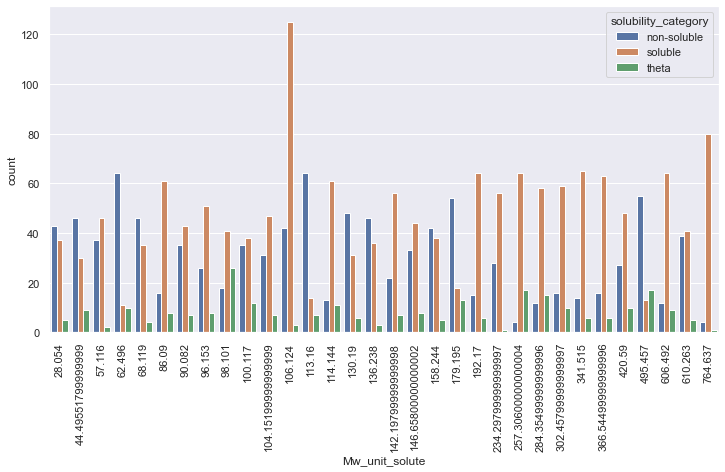

In [43]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(data=model_df1,x='Mw_unit_solute', order=col_order, hue='solubility_category')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '1000'),
  Text(1, 0, '1500'),
  Text(2, 0, '2000'),
  Text(3, 0, '3000'),
  Text(4, 0, '3500'),
  Text(5, 0, '4475'),
  Text(6, 0, '5000'),
  Text(7, 0, '6000'),
  Text(8, 0, '10000'),
  Text(9, 0, '20000'),
  Text(10, 0, '30000'),
  Text(11, 0, '35000'),
  Text(12, 0, '97500'),
  Text(13, 0, '100000'),
  Text(14, 0, '120000'),
  Text(15, 0, '125000'),
  Text(16, 0, '200000'),
  Text(17, 0, '220000'),
  Text(18, 0, '233000'),
  Text(19, 0, '250000'),
  Text(20, 0, '400000'),
  Text(21, 0, '780000'),
  Text(22, 0, '1000000'),
  Text(23, 0, '1500000')])

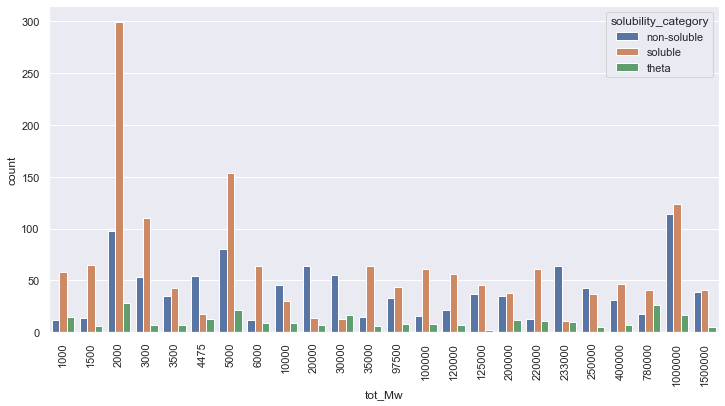

In [44]:
col_order1=model_df1['tot_Mw'].value_counts().index.to_list().sort()
sns.set(rc={'figure.figsize':(12,6)})

sns.countplot(data=model_df1,x='tot_Mw', order=col_order1, hue='solubility_category')
plt.xticks(rotation=90)

#### Insights:
 - `The largest number of "soluble" polymers (solutes) are those with the unit Mw of 103 g/mol` 
 - `The "non-soluble" polymers (solutes) are those with the unit Mw of 62, 113 and 495 g/mol` 
 - `The largest number of "soluble" polymers (solutes) are those with the total Mw of 2000 g/mol` 

In [45]:
labels
features=[item for item in labels if item!='solubility_category']

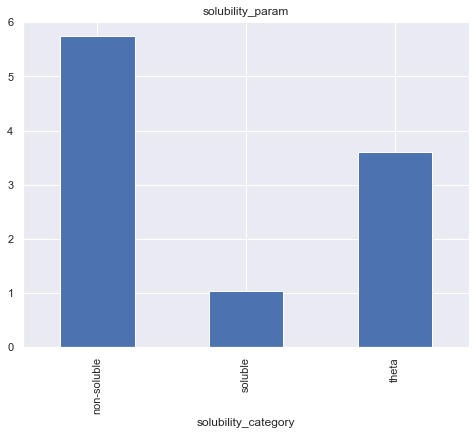

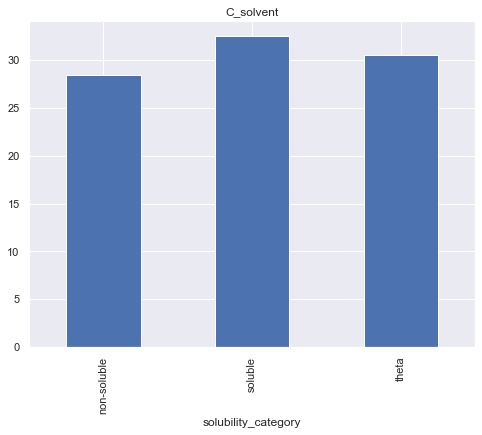

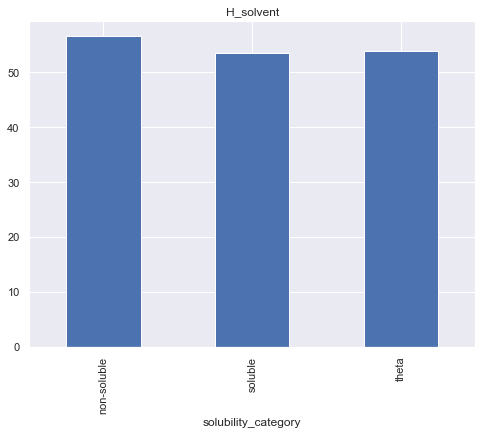

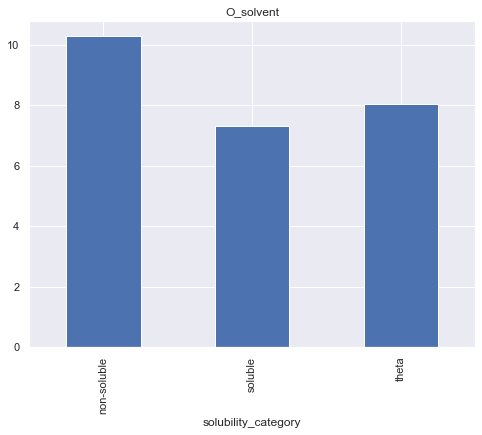

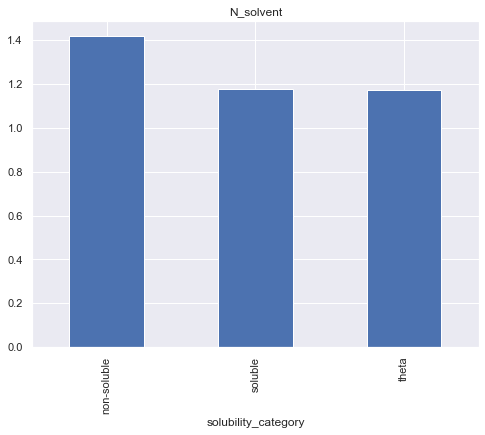

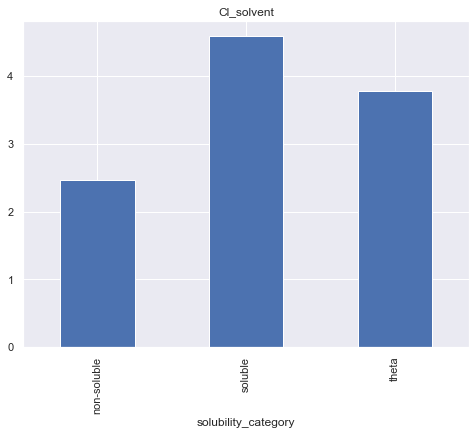

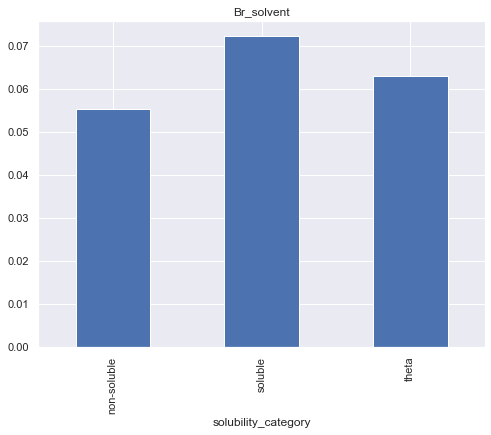

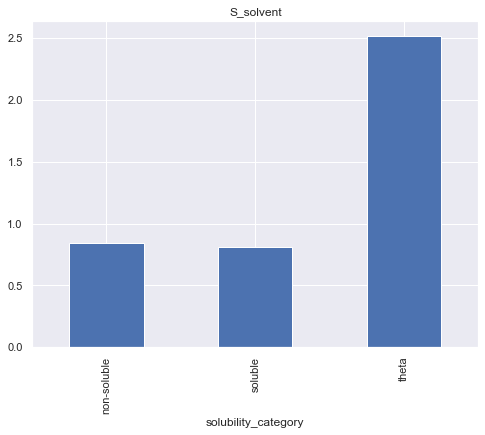

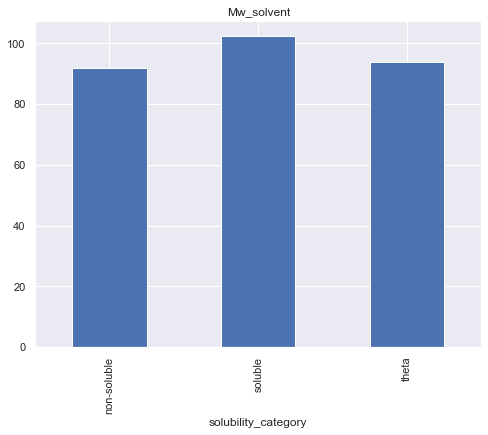

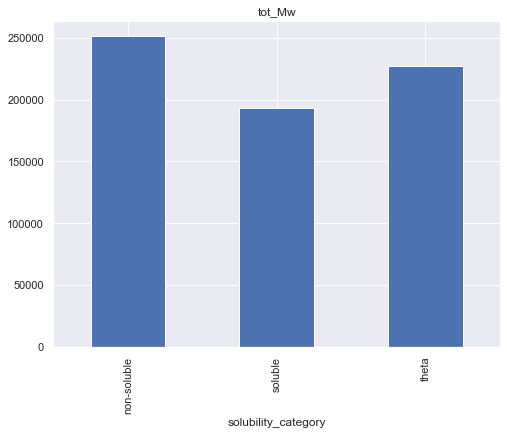

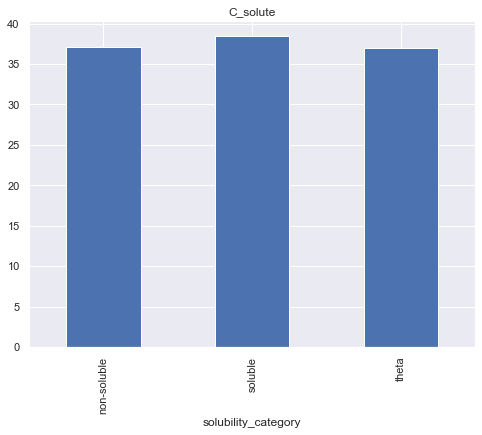

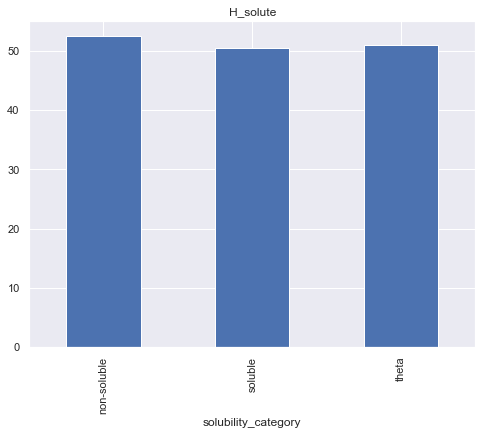

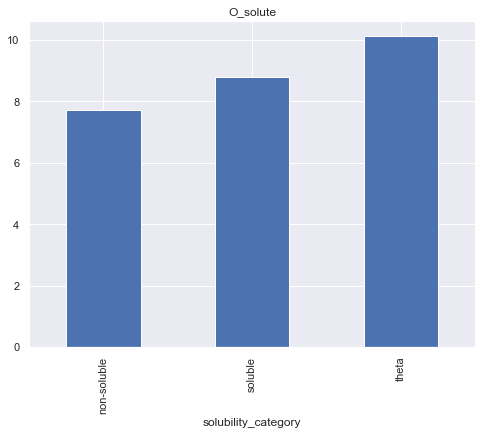

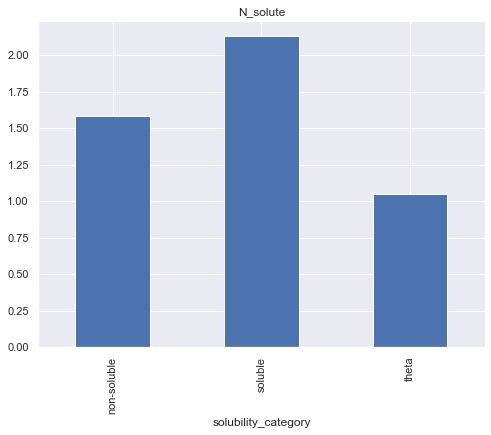

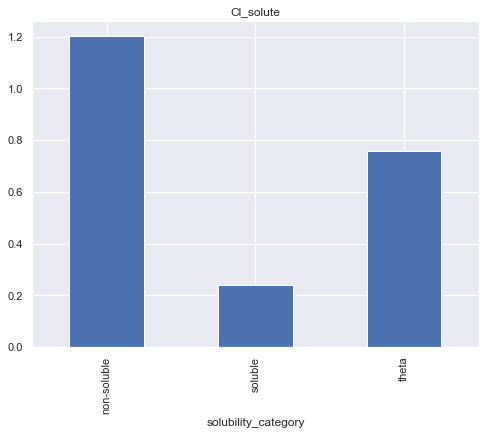

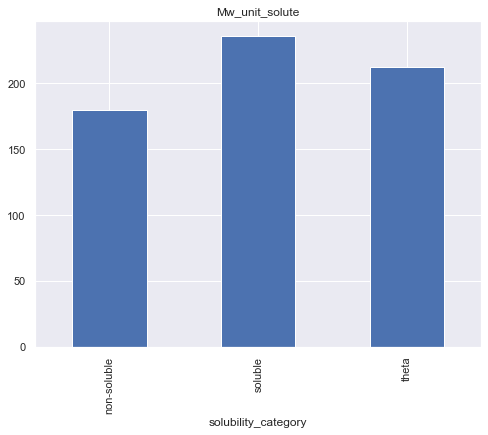

In [46]:
sns.set(rc={'figure.figsize':(8,6)})
for i in features:
    model_df1.groupby('solubility_category')[i].mean().plot(kind='bar')
    plt.title(i)
    plt.show()

#### Insights:
 - `Solvents that are dissolving ("soluble") have on average higher number of Carbons and higher Mw` 
 - `Solvents that are non-dissolving ("non-soluble") have on average higher number of Oxygens and Nitrogens`   
 - `Solvents that are dissolving ("soluble") have on average higher number of Chlorine and Bromide` 
 - `Solvents that are neutral ("theta") have on average higher number of Sulfur`
 - `Polymers (solutes) that are non-soluble have on average higher total Mw`
 - `Polymers (solutes) that are non-soluble have on average lower number of Oxygens, and highest number of Oxygens for neutral, theta polymer solubility`
 - `Polymers (solutes) that are soluble have on average higher number of Nitrogens`
 - `Polymers (solutes) that are non-soluble have on average higher number of Chlorines`
 - `Polymers (solutes) that are soluble have on average higher unit Mw`

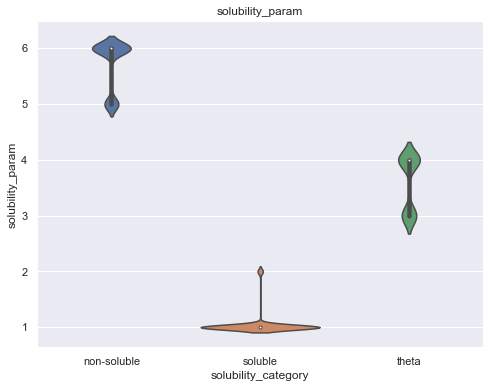

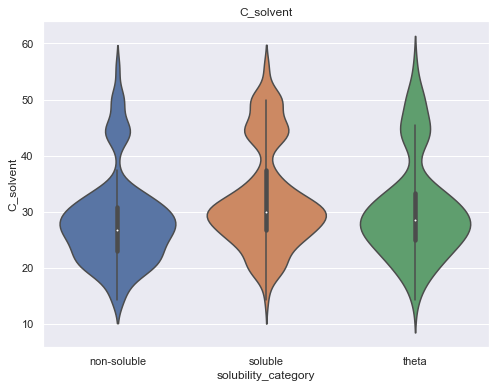

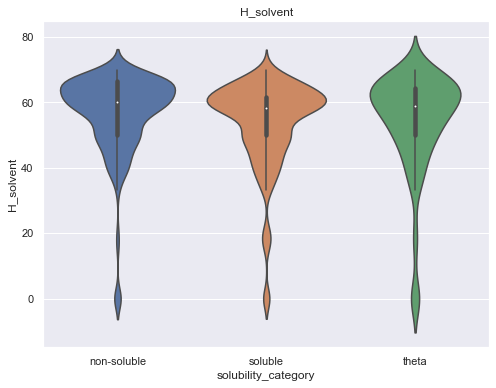

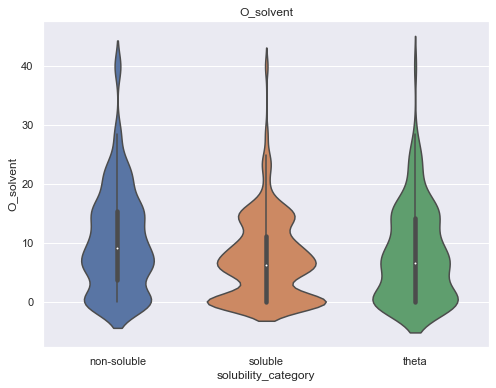

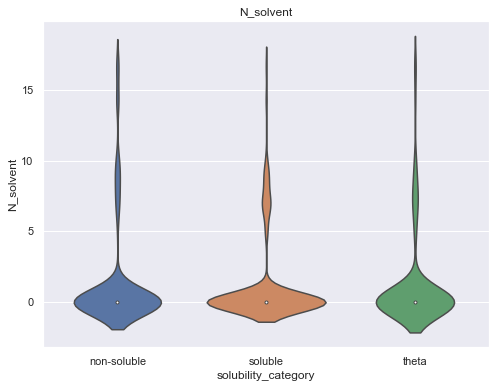

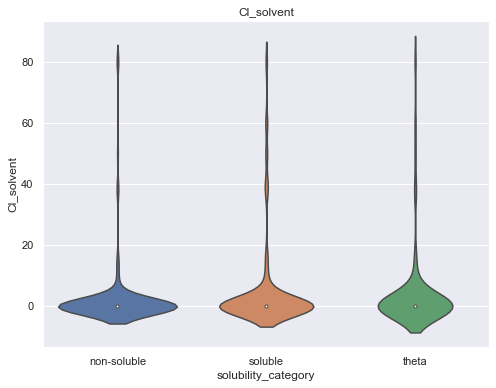

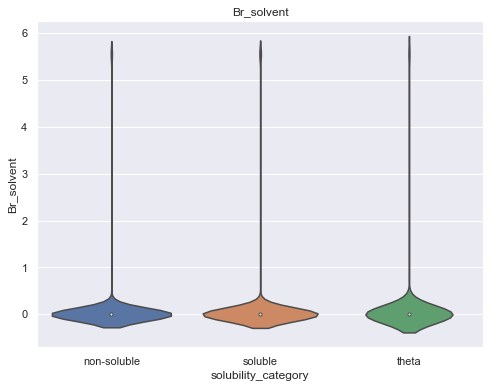

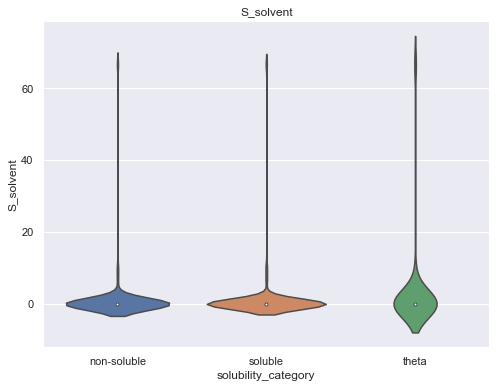

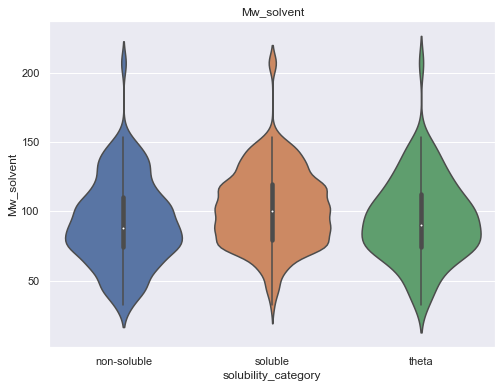

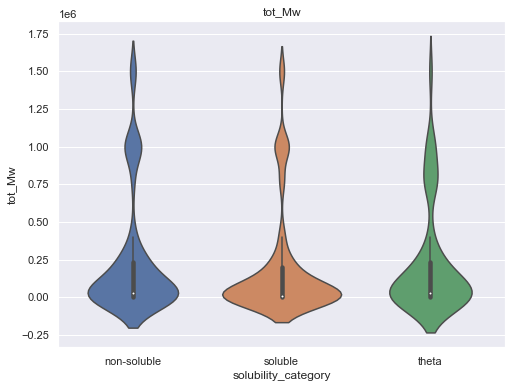

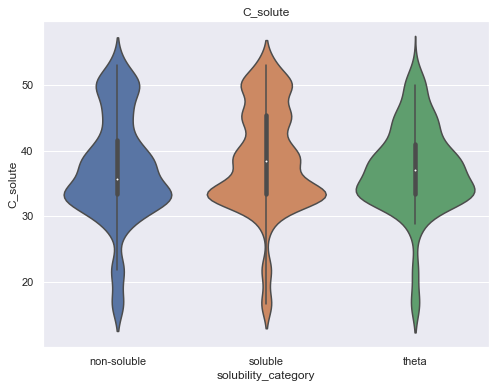

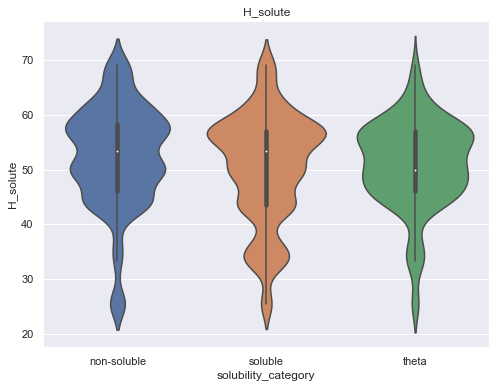

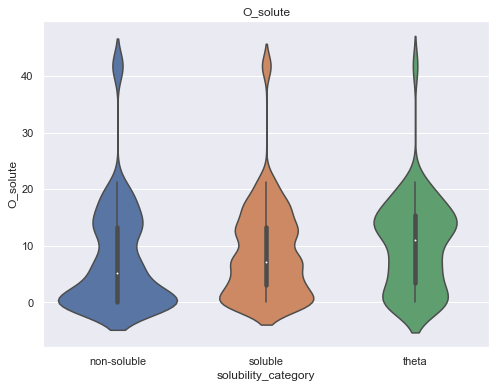

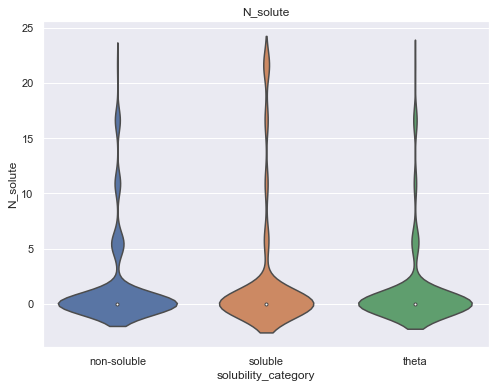

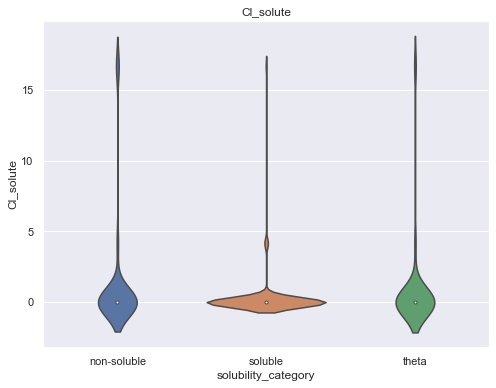

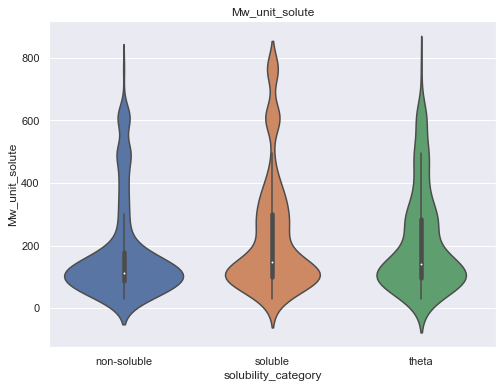

In [47]:
sns.set(rc={'figure.figsize':(8,6)})
for i in features:
    sns.violinplot(x='solubility_category', y=i, data = model_df1)
    plt.title(i)
    plt.show()

#### Insights:
 - `Most of the data seem to be skewed to the right (expect multiple outliers for higher values)`  

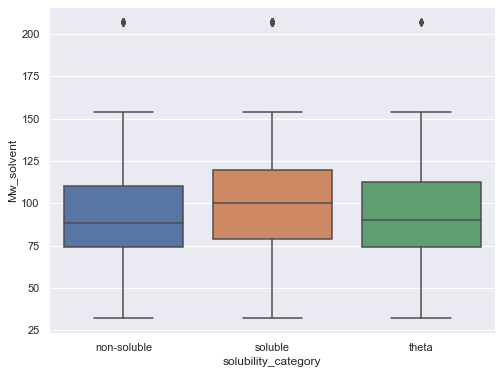

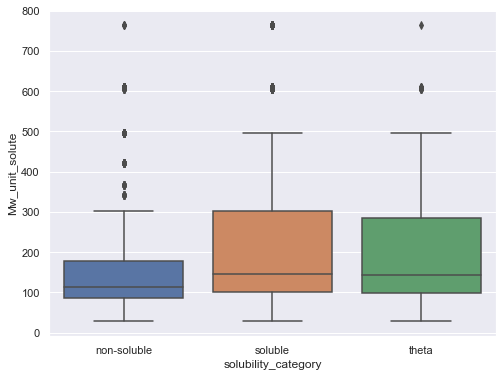

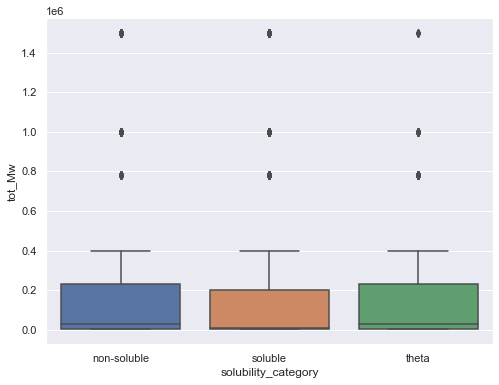

In [48]:
sns.set(rc={'figure.figsize':(8,6)})
for i in ['Mw_solvent', 'Mw_unit_solute', 'tot_Mw']:
    sns.boxplot(x='solubility_category',y=i, data=model_df1)
    plt.show()

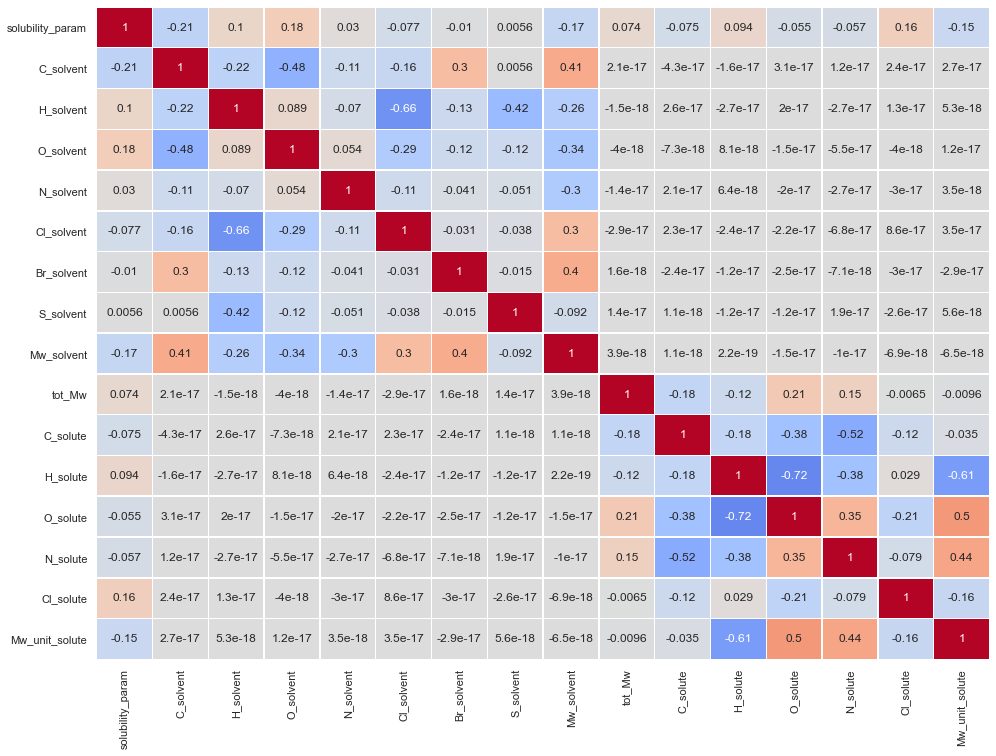

In [49]:
sns.set(rc={'figure.figsize':(16,12)})
sns.heatmap(model_df1.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="coolwarm")
plt.show()

#### Insights:
 - `H_solute correlates with O_solte, and also with the Mw_unit_solte, so that can be dropped` 

In [51]:
#model_df2=model_df1.drop(['H_solute'], axis=1)

### Data Transformation & Scaling 

In [50]:
# Transform an attribute using a Log transformation to decrease the number of upper outlier.

# log_transformer = FunctionTransformer(np.log1p)

# log_transformer

In [52]:
# Log Transform the molecular weights
model_df3=model_df1.copy()

for i in ['Mw_solvent', 'Mw_unit_solute', 'tot_Mw']:
    model_df3[i+'_log']=np.log1p(model_df3[i])
    model_df3.drop(i, axis=1, inplace=True)  

model_df3.head(3)

,solubility_param,solubility_category,C_solvent,H_solvent,O_solvent,N_solvent,Cl_solvent,Br_solvent,S_solvent,C_solute,H_solute,O_solute,N_solute,Cl_solute,Mw_solvent_log,Mw_unit_solute_log,tot_Mw_log
0,5,non-soluble,16.666667,66.666667,16.666667,0.0,0.0,0.0,0.0,33.333333,55.555556,11.111111,0.0,0.0,3.497779,4.746184,12.301387
1,4,theta,21.929825,66.666667,11.403509,0.0,0.0,0.0,0.0,33.333333,55.555556,11.111111,0.0,0.0,3.866808,4.746184,12.301387
2,5,non-soluble,22.148394,66.666667,11.184939,0.0,0.0,0.0,0.0,33.333333,55.555556,11.111111,0.0,0.0,3.855435,4.746184,12.301387


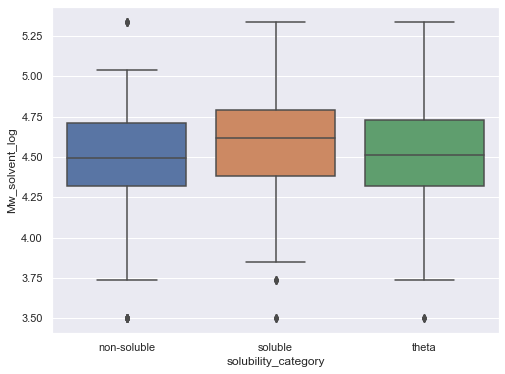

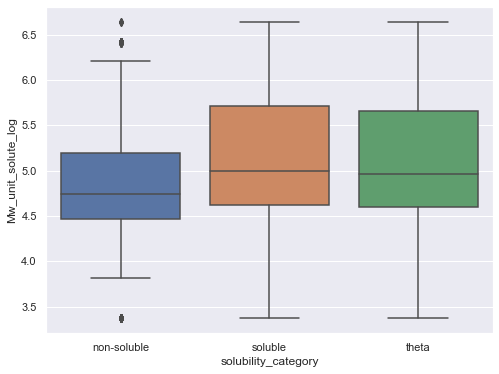

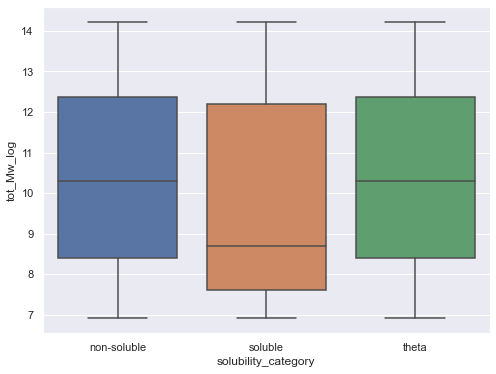

In [53]:
sns.set(rc={'figure.figsize':(8,6)})
for i in ['Mw_solvent_log', 'Mw_unit_solute_log', 'tot_Mw_log']:
    sns.boxplot(x='solubility_category',y=i, data=model_df3)
    plt.show()

In [54]:
model_df3.dtypes

solubility_param          int64
solubility_category    category
C_solvent               float64
H_solvent               float64
O_solvent               float64
N_solvent               float64
Cl_solvent              float64
Br_solvent              float64
S_solvent               float64
C_solute                float64
H_solute                float64
O_solute                float64
N_solute                float64
Cl_solute               float64
Mw_solvent_log          float64
Mw_unit_solute_log      float64
tot_Mw_log              float64
dtype: object

## Encoding Cathegorical & Data Split:


In [55]:
X = model_df3.drop(['solubility_param', 'solubility_category'], axis=1)
y = model_df3['solubility_category']
print(X.shape, y.shape)


(2805, 15) (2805,)


In [56]:
X.to_csv("output/X_model.csv")
y.to_csv("output/y_model.csv")

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=760935, stratify=y, test_size=0.25)


In [58]:
X_scaler = MinMaxScaler().fit(X)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [59]:
X_test.dtypes


C_solvent             float64
H_solvent             float64
O_solvent             float64
N_solvent             float64
Cl_solvent            float64
Br_solvent            float64
S_solvent             float64
C_solute              float64
H_solute              float64
O_solute              float64
N_solute              float64
Cl_solute             float64
Mw_solvent_log        float64
Mw_unit_solute_log    float64
tot_Mw_log            float64
dtype: object

In [60]:
# Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)


In [61]:
# Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)


In [62]:
y_test_categorical


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [63]:
print(y_test_categorical.shape)


(702, 3)


# Deep Learning Model

In [72]:
#model.fit?

In [132]:
# Create a Neural Network model here
model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=15))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=3, activation='softmax'))


In [133]:
# Compile the model
model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


In [134]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 200)               3200      
_________________________________________________________________
dense_28 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_29 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_30 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 603       
Total params: 124,403
Trainable params: 124,403
Non-trainable params: 0
_________________________________________________________________


In [137]:
# Fit the model
model.fit(
    X_train_scaled,
    y_train_categorical,
#    batch_size=50,
    epochs=500,
    class_weight={0:0.4, 1:0.1, 2:0.5},
    shuffle=True,
    verbose=2
)


Train on 2103 samples
Epoch 1/500
2103/2103 - 0s - loss: 0.0227 - accuracy: 0.9425
Epoch 2/500
2103/2103 - 0s - loss: 0.0253 - accuracy: 0.9396
Epoch 3/500
2103/2103 - 0s - loss: 0.0596 - accuracy: 0.8711
Epoch 4/500
2103/2103 - 0s - loss: 0.0498 - accuracy: 0.8897
Epoch 5/500
2103/2103 - 0s - loss: 0.0325 - accuracy: 0.9196
Epoch 6/500
2103/2103 - 0s - loss: 0.0360 - accuracy: 0.9196
Epoch 7/500
2103/2103 - 0s - loss: 0.0391 - accuracy: 0.9154
Epoch 8/500
2103/2103 - 0s - loss: 0.0317 - accuracy: 0.9263
Epoch 9/500
2103/2103 - 0s - loss: 0.0323 - accuracy: 0.9239
Epoch 10/500
2103/2103 - 0s - loss: 0.0317 - accuracy: 0.9215
Epoch 11/500
2103/2103 - 0s - loss: 0.0317 - accuracy: 0.9272
Epoch 12/500
2103/2103 - 0s - loss: 0.0333 - accuracy: 0.9220
Epoch 13/500
2103/2103 - 0s - loss: 0.0303 - accuracy: 0.9253
Epoch 14/500
2103/2103 - 0s - loss: 0.0349 - accuracy: 0.9239
Epoch 15/500
2103/2103 - 0s - loss: 0.0268 - accuracy: 0.9344
Epoch 16/500
2103/2103 - 0s - loss: 0.0266 - accuracy: 0.

Epoch 133/500
2103/2103 - 0s - loss: 0.0209 - accuracy: 0.9448
Epoch 134/500
2103/2103 - 0s - loss: 0.0218 - accuracy: 0.9425
Epoch 135/500
2103/2103 - 0s - loss: 0.0215 - accuracy: 0.9448
Epoch 136/500
2103/2103 - 0s - loss: 0.0211 - accuracy: 0.9439
Epoch 137/500
2103/2103 - 0s - loss: 0.0212 - accuracy: 0.9439
Epoch 138/500
2103/2103 - 0s - loss: 0.0286 - accuracy: 0.9339
Epoch 139/500
2103/2103 - 0s - loss: 0.0778 - accuracy: 0.8531
Epoch 140/500
2103/2103 - 0s - loss: 0.0614 - accuracy: 0.8626
Epoch 141/500
2103/2103 - 0s - loss: 0.0346 - accuracy: 0.9173
Epoch 142/500
2103/2103 - 0s - loss: 0.0406 - accuracy: 0.9073
Epoch 143/500
2103/2103 - 0s - loss: 0.0355 - accuracy: 0.9149
Epoch 144/500
2103/2103 - 0s - loss: 0.0265 - accuracy: 0.9311
Epoch 145/500
2103/2103 - 0s - loss: 0.0335 - accuracy: 0.9253
Epoch 146/500
2103/2103 - 0s - loss: 0.0355 - accuracy: 0.9211
Epoch 147/500
2103/2103 - 0s - loss: 0.0249 - accuracy: 0.9344
Epoch 148/500
2103/2103 - 0s - loss: 0.0235 - accuracy:

2103/2103 - 0s - loss: 0.0251 - accuracy: 0.9382
Epoch 264/500
2103/2103 - 0s - loss: 0.0276 - accuracy: 0.9372
Epoch 265/500
2103/2103 - 0s - loss: 0.0212 - accuracy: 0.9439
Epoch 266/500
2103/2103 - 0s - loss: 0.0206 - accuracy: 0.9444
Epoch 267/500
2103/2103 - 0s - loss: 0.0204 - accuracy: 0.9444
Epoch 268/500
2103/2103 - 0s - loss: 0.0204 - accuracy: 0.9448
Epoch 269/500
2103/2103 - 0s - loss: 0.0203 - accuracy: 0.9444
Epoch 270/500
2103/2103 - 0s - loss: 0.0202 - accuracy: 0.9458
Epoch 271/500
2103/2103 - 0s - loss: 0.0202 - accuracy: 0.9453
Epoch 272/500
2103/2103 - 0s - loss: 0.0202 - accuracy: 0.9458
Epoch 273/500
2103/2103 - 0s - loss: 0.0200 - accuracy: 0.9453
Epoch 274/500
2103/2103 - 0s - loss: 0.0201 - accuracy: 0.9453
Epoch 275/500
2103/2103 - 0s - loss: 0.0201 - accuracy: 0.9458
Epoch 276/500
2103/2103 - 0s - loss: 0.0201 - accuracy: 0.9453
Epoch 277/500
2103/2103 - 0s - loss: 0.0201 - accuracy: 0.9458
Epoch 278/500
2103/2103 - 0s - loss: 0.0200 - accuracy: 0.9458
Epoch 

Epoch 394/500
2103/2103 - 0s - loss: 0.0280 - accuracy: 0.9334
Epoch 395/500
2103/2103 - 0s - loss: 0.0788 - accuracy: 0.8735
Epoch 396/500
2103/2103 - 0s - loss: 0.0657 - accuracy: 0.8564
Epoch 397/500
2103/2103 - 0s - loss: 0.0366 - accuracy: 0.9149
Epoch 398/500
2103/2103 - 0s - loss: 0.0264 - accuracy: 0.9349
Epoch 399/500
2103/2103 - 0s - loss: 0.0242 - accuracy: 0.9353
Epoch 400/500
2103/2103 - 0s - loss: 0.0215 - accuracy: 0.9434
Epoch 401/500
2103/2103 - 0s - loss: 0.0209 - accuracy: 0.9439
Epoch 402/500
2103/2103 - 0s - loss: 0.0206 - accuracy: 0.9448
Epoch 403/500
2103/2103 - 0s - loss: 0.0205 - accuracy: 0.9453
Epoch 404/500
2103/2103 - 0s - loss: 0.0204 - accuracy: 0.9434
Epoch 405/500
2103/2103 - 0s - loss: 0.0202 - accuracy: 0.9448
Epoch 406/500
2103/2103 - 0s - loss: 0.0202 - accuracy: 0.9453
Epoch 407/500
2103/2103 - 0s - loss: 0.0201 - accuracy: 0.9453
Epoch 408/500
2103/2103 - 0s - loss: 0.0202 - accuracy: 0.9434
Epoch 409/500
2103/2103 - 0s - loss: 0.0200 - accuracy:

## Quantify the Trained Model

In [138]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")


702/1 - 0s - loss: 3.1227 - accuracy: 0.7236
Normal Neural Network - Loss: 3.802574592438179, Accuracy: 0.7236467003822327


#### Insights: 
 - `Additional data could increase the model accuracy` 

In [91]:
#Make prediction

predictions=np.argmax(model.predict(X_test_scaled), axis=-1)

In [92]:
encoded_results = label_encoder.inverse_transform(predictions)

In [93]:
deepmodel_df = pd.DataFrame({"Actual_solubility_category": y_test, "Predicted_solubility_category": encoded_results})
deepmodel_df.reset_index(inplace=True)


In [94]:
deepmodel_df.sample(5)

,index,Actual_solubility_category,Predicted_solubility_category
442,1947,soluble,soluble
3,786,soluble,soluble
86,238,soluble,soluble
389,1325,non-soluble,non-soluble
346,890,soluble,soluble


In [95]:
len(deepmodel_df)

702

In [96]:
err=0
for i in range(len(deepmodel_df)):
    if deepmodel_df.loc[i, 'Predicted_solubility_category']!=deepmodel_df.loc[i, 'Actual_solubility_category']:
        err+=1

In [97]:
print(f"percent loss is {round(err/len(deepmodel_df)*100, 2)} %")
print(f"percent acc. is {100-round(err/len(deepmodel_df)*100, 2)} %")

percent loss is 27.64 %
percent acc. is 72.36 %


In [98]:
tested_df=full_solubility.loc[deepmodel_df['index'], ['solutes', 'Polymer_name', 'solvents']]
tested_df

,solutes,Polymer_name,solvents
2319,AC,"Piccolyte S100-terpene resin, Pennsylvania Ind...",Cellusolve_acetate
1863,V,"Cariflex IR 305-isoprene raw elastomer, Shell ...",Hexane
2016,Y,Buna Huls CB JO-cis poly butadiene raw elastom...,Carbon_terachloride
786,J,Sec_Nitrocellulose-H 23 Hagedorn and Co Osnabr...,Butyl_dioxitol
343,E,"Pentalyn 830-alcohol soluble rosin resin, Herc...",n-Propanol
...,...,...,...
491,F,"Butvar B76-poly (vinyl butyral), Shawinigan Re...",Trichloroethylene
190,C,"Epikote 1001-epoxy, Shell Chemical Co",Methyl_dioxitol
576,G,"Polystyrene LG, Badische Anilin- und Soda Fabrik",Trichloroethylene
1759,U,Hycar 1052-acrylonitrile-butadiene raw elastom...,Cyclohexylamine


In [99]:
tested_df.reset_index(inplace=True)
tested_df.head(3)

,index,solutes,Polymer_name,solvents
0,2319,AC,"Piccolyte S100-terpene resin, Pennsylvania Ind...",Cellusolve_acetate
1,1863,V,"Cariflex IR 305-isoprene raw elastomer, Shell ...",Hexane
2,2016,Y,Buna Huls CB JO-cis poly butadiene raw elastom...,Carbon_terachloride


In [100]:
tested_results=pd.concat([tested_df, deepmodel_df], axis=1)
tested_results.head()

,index,solutes,Polymer_name,solvents,index,Actual_solubility_category,Predicted_solubility_category
0,2319,AC,"Piccolyte S100-terpene resin, Pennsylvania Ind...",Cellusolve_acetate,2319,non-soluble,non-soluble
1,1863,V,"Cariflex IR 305-isoprene raw elastomer, Shell ...",Hexane,1863,soluble,soluble
2,2016,Y,Buna Huls CB JO-cis poly butadiene raw elastom...,Carbon_terachloride,2016,soluble,soluble
3,786,J,Sec_Nitrocellulose-H 23 Hagedorn and Co Osnabr...,Butyl_dioxitol,786,soluble,soluble
4,343,E,"Pentalyn 830-alcohol soluble rosin resin, Herc...",n-Propanol,343,soluble,theta


In [101]:
tested_results.tail()
# tested_results.drop(['index'], axis=1, inplace=True)

,index,solutes,Polymer_name,solvents,index,Actual_solubility_category,Predicted_solubility_category
697,491,F,"Butvar B76-poly (vinyl butyral), Shawinigan Re...",Trichloroethylene,491,soluble,soluble
698,190,C,"Epikote 1001-epoxy, Shell Chemical Co",Methyl_dioxitol,190,soluble,soluble
699,576,G,"Polystyrene LG, Badische Anilin- und Soda Fabrik",Trichloroethylene,576,soluble,soluble
700,1759,U,Hycar 1052-acrylonitrile-butadiene raw elastom...,Cyclohexylamine,1759,soluble,soluble
701,2139,AA,Ester gum BL Hercules Incorporated,m-Cresol,2139,soluble,soluble


In [102]:
tested_results.to_csv("output/predictions_output_3.csv")

In [103]:
model.save("output/SolubilityModel6.h5")


In [104]:
tested_df=pd.read_csv("output/predictions_output_3.csv")
del tested_df['Unnamed: 0']
tested_df.head()

,index,solutes,Polymer_name,solvents,index.1,Actual_solubility_category,Predicted_solubility_category
0,2319,AC,"Piccolyte S100-terpene resin, Pennsylvania Ind...",Cellusolve_acetate,2319,non-soluble,non-soluble
1,1863,V,"Cariflex IR 305-isoprene raw elastomer, Shell ...",Hexane,1863,soluble,soluble
2,2016,Y,Buna Huls CB JO-cis poly butadiene raw elastom...,Carbon_terachloride,2016,soluble,soluble
3,786,J,Sec_Nitrocellulose-H 23 Hagedorn and Co Osnabr...,Butyl_dioxitol,786,soluble,soluble
4,343,E,"Pentalyn 830-alcohol soluble rosin resin, Herc...",n-Propanol,343,soluble,theta


In [105]:
t_df=pd.DataFrame(tested_df['Actual_solubility_category'].value_counts(normalize=True)*100)
t_df['Predicted_solubility_category']=tested_df['Predicted_solubility_category'].value_counts(normalize=True)*100   
t_df

,Actual_solubility_category,Predicted_solubility_category
soluble,54.843305,55.982906
non-soluble,35.754986,36.324786
theta,9.401709,7.692308


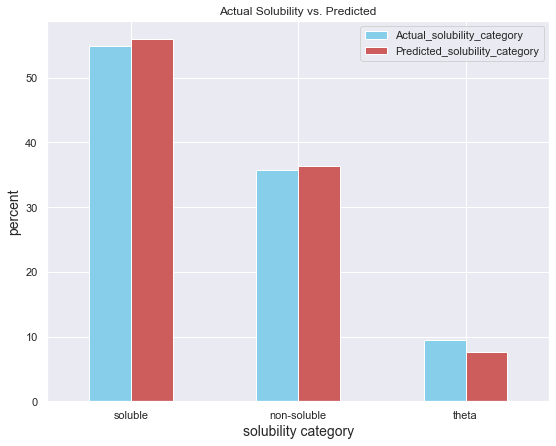

In [106]:
ax = t_df.plot.bar(color=["SkyBlue","IndianRed"], rot=0, title="Actual Solubility vs. Predicted", figsize=(9,7))
ax.set_xlabel("solubility category", fontsize=14)
ax.set_ylabel("percent", fontsize=14)
plt.savefig("output/actual_predicted_count.png")
plt.show()

#### Insights:
 - `Model predictions are higher for 'soluble' category vs. actual and lower for other categories` 
 - `The 'theta' category showed the highest deviation vs. actual as a rare group` 
 - `Looks like the model predictions are the most accurate for the 'non-soluble' category`

                                      **end of model build**